In [1]:
import matplotlib.pyplot as plt
from Graph import Graph
from Queue import Queue
from Stack import Stack
from heuristic_func import *
from searching_algorithms import Astar, DFS
from maze_preprocess import Node
from copy import deepcopy
from bonus_wrapper import *

Graph initialized from maze with size 21 x 21


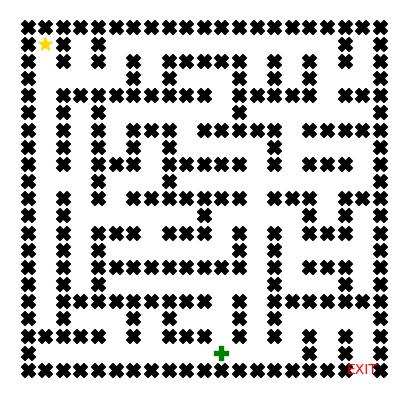

Starting point (x, y) = (1, 1)
Ending point (x, y) = (20, 19)
Bonus point at position (x, y) = (19, 11) with point -10


In [2]:
g = Graph('testcases/bonus2.txt')
fs = (5, 5)
g.visualize(figsize=fs)

Với trường hợp có điểm thưởng:
- Xây dựng một đồ thị mới chỉ gồm các điểm thưởng và START, END.
- Tất cả các đỉnh được nối với nhau (đồ thị đủ).
- Trọng số nối giữa các cạnh là khoảng cách heuristic giữa 2 đỉnh đó + số điểm thưởng.
- Tìm đường đi ngắn nhất từ START -> END trên đồ thị này.
- Với danh sách đường đi tìm được, tìm đường đi ngắn nhất thực tế trên mỗi chặng.

In [3]:
rg = make_routing_graph(g, manhattan_heuristic)

In [4]:
Astar(rg, euclide_heuristic)

True

In [5]:
journey, _ = rg.get_path()

In [6]:
journey

[(1, 1), (19, 11), (20, 19)]

In [7]:
wrapped_Astar = lambda graph, start, end: Astar(graph, manhattan_heuristic, start, end)
journey = bonus_traversal_wrapper(g, wrapped_Astar, journey)

Going from (1, 1) to 1
Result found! Keep going!
Going from (19, 11) to 2
Result found! Keep going!


In [8]:
visited, path, cost = process_journey(g, journey)

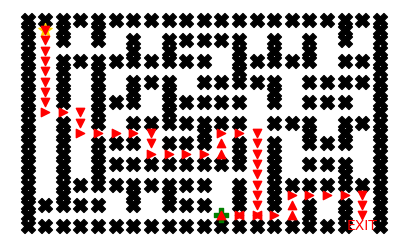

Starting point (x, y) = (1, 1)
Ending point (x, y) = (20, 19)
Bonus point at position (x, y) = (19, 11) with point -10


39

In [9]:
g.visualize(path)
cost

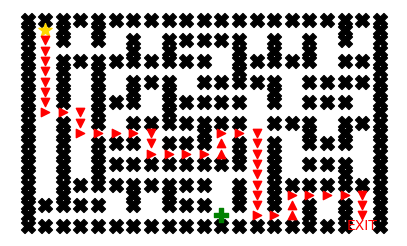

Starting point (x, y) = (1, 1)
Ending point (x, y) = (20, 19)
Bonus point at position (x, y) = (19, 11) with point -10


45

In [10]:
g.clear()
Astar(g, manhattan_heuristic)
visited, path, cost = g.get_visited()
g.visualize(path)
cost